# Student Name: Ojei Victory
# Student Number: 202137995
## Module Name: UNDERSTANDING AI MODULE 771763_A24_T1


#### COMPONENT ONE: Sales Performance of Video Games 

In [1]:
import pandas as pd
#Load Dataset
video_games_df = pd.read_csv("Video_Games.csv")

video_games_df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


#### 1a

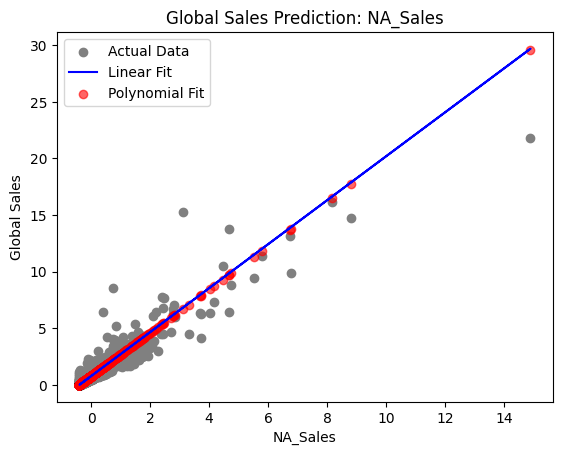

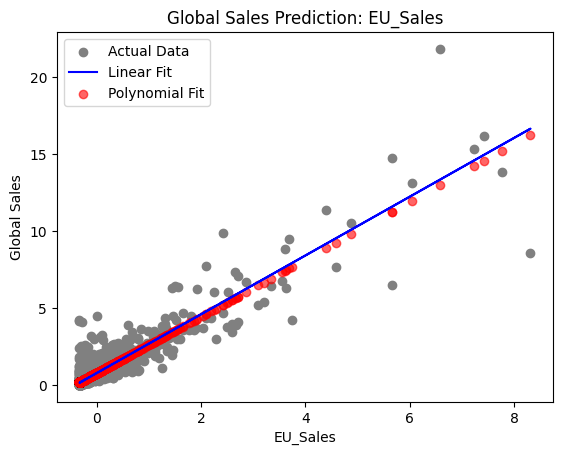

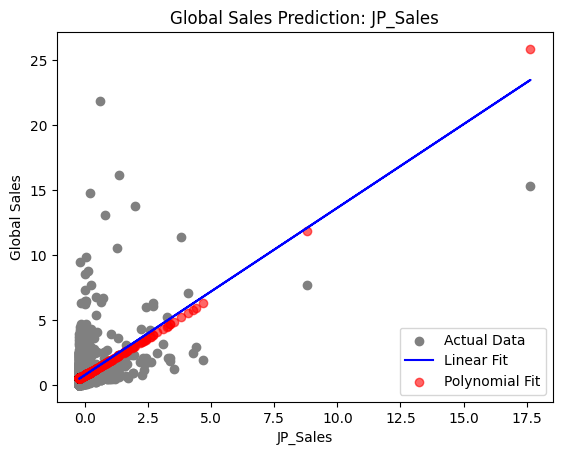

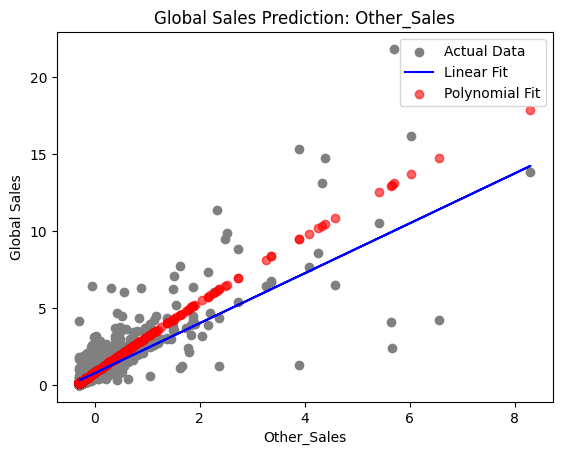

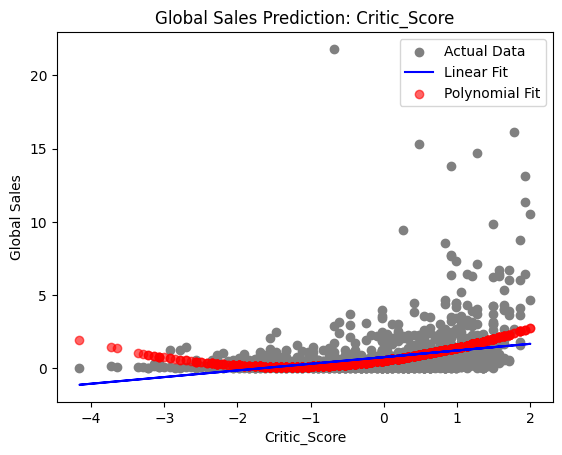

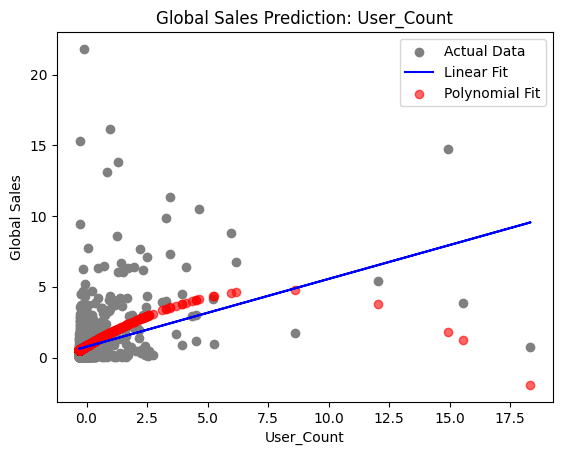

Results for Single-Feature Models:
Feature: NA_Sales
  Linear Model: MSE = 0.3477780330216357 , R2 = 0.8569465303347388
  Polynomial Model: MSE = 0.3410275799704276 , R2 = 0.8597232316761018
Feature: EU_Sales
  Linear Model: MSE = 0.40639376855011305 , R2 = 0.8328357943245424
  Polynomial Model: MSE = 0.4045699401273089 , R2 = 0.833585999798101
Feature: JP_Sales
  Linear Model: MSE = 1.9967180250470213 , R2 = 0.17867888622978512
  Polynomial Model: MSE = 2.0235950294062244 , R2 = 0.16762341876858067
Feature: Other_Sales
  Linear Model: MSE = 0.7489559890869906 , R2 = 0.6919277737740089
  Polynomial Model: MSE = 0.7343046107089419 , R2 = 0.697954406606877
Feature: Critic_Score
  Linear Model: MSE = 2.1973526509839933 , R2 = 0.09615073134344665
  Polynomial Model: MSE = 2.0543183276094275 , R2 = 0.15498583390060472
Feature: User_Count
  Linear Model: MSE = 2.051060754398331 , R2 = 0.1563257895800565
  Polynomial Model: MSE = 1.957856035135025 , R2 = 0.19466420435556098


In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Selecting numerical features for regression analysis
numerical_features = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score', 'User_Count']
target = 'Global_Sales'

# Drop rows with missing values in the relevant columns
filtered_df = video_games_df.dropna(subset=numerical_features + [target])

# Initialize a dictionary to store results
results = {}

# Iterate through each numerical feature
for feature in numerical_features:
    X = filtered_df[[feature]].values  # Single feature
    y = filtered_df[target].values  # Target variable
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Linear regression
    linear_model = LinearRegression()
    linear_model.fit(X_train_scaled, y_train)
    y_pred_linear = linear_model.predict(X_test_scaled)
    
    # Polynomial regression (degree 2)
    poly = PolynomialFeatures(degree=2)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
    y_pred_poly = poly_model.predict(X_test_poly)
    
    # Evaluate models
    linear_mse = mean_squared_error(y_test, y_pred_linear)
    linear_r2 = r2_score(y_test, y_pred_linear)
    
    poly_mse = mean_squared_error(y_test, y_pred_poly)
    poly_r2 = r2_score(y_test, y_pred_poly)
    
    # Store results
    results[feature] = {
        'Linear': {'MSE': linear_mse, 'R2': linear_r2},
        'Polynomial': {'MSE': poly_mse, 'R2': poly_r2}
    }
    
    # Plotting results
    plt.scatter(X_test_scaled, y_test, color='gray', label='Actual Data')
    plt.plot(X_test_scaled, y_pred_linear, color='blue', label='Linear Fit')
    plt.scatter(X_test_scaled, y_pred_poly, color='red', label='Polynomial Fit', alpha=0.6)
    plt.title("Global Sales Prediction: " + feature)
    plt.xlabel(feature)
    plt.ylabel("Global Sales")
    plt.legend()
    plt.show()

# Print results
print("Results for Single-Feature Models:")
for feature, metrics in results.items():
    print("Feature:", feature)
    print("  Linear Model: MSE =", metrics['Linear']['MSE'], ", R2 =", metrics['Linear']['R2'])
    print("  Polynomial Model: MSE =", metrics['Polynomial']['MSE'], ", R2 =", metrics['Polynomial']['R2'])

#### 1b

In [3]:
# Selecting numerical features for regression analysis
numerical_features = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score', 'User_Count']
target = 'Global_Sales'

# Drop rows with missing values in the relevant columns
filtered_df = video_games_df.dropna(subset=numerical_features + [target])

# Prepare data for multiple feature regression
X = filtered_df[numerical_features].values 
y = filtered_df[target].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a linear regression model on multiple features
multi_linear_model = LinearRegression()
multi_linear_model.fit(X_train_scaled, y_train)
y_pred_multi_linear = multi_linear_model.predict(X_test_scaled)

# Train a polynomial regression model (degree 2) on multiple features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
multi_poly_model = LinearRegression()
multi_poly_model.fit(X_train_poly, y_train)
y_pred_multi_poly = multi_poly_model.predict(X_test_poly)

# Evaluate models
multi_linear_mse = mean_squared_error(y_test, y_pred_multi_linear)
multi_linear_r2 = r2_score(y_test, y_pred_multi_linear)

multi_poly_mse = mean_squared_error(y_test, y_pred_multi_poly)
multi_poly_r2 = r2_score(y_test, y_pred_multi_poly)

# Compare results
multi_feature_results = {
    'Multi-Feature Linear': {'MSE': multi_linear_mse, 'R2': multi_linear_r2},
    'Multi-Feature Polynomial': {'MSE': multi_poly_mse, 'R2': multi_poly_r2}
}

# Print the results
print("Results for Multi-Feature Regression Models:")
for model_type, metrics in multi_feature_results.items():
    print(model_type + ": MSE = " + str(metrics['MSE']) + ", R2 = " + str(metrics['R2']))


Results for Multi-Feature Regression Models:
Multi-Feature Linear: MSE = 3.415202424043341e-05, R2 = 0.9999859520582102
Multi-Feature Polynomial: MSE = 3.496777232563683e-05, R2 = 0.9999856165120201


#### 1c

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define numerical and categorical features
numerical_features = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score', 'User_Count']
categorical_features = ['Platform', 'Genre', 'Publisher', 'Rating']
target = 'Global_Sales'

# Drop rows with missing values in the relevant columns
filtered_df = video_games_df.dropna(subset=numerical_features + [target] + categorical_features)

# Define features (X) and target (y)
X = filtered_df[numerical_features + categorical_features]
y = filtered_df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess data: Scale numerical features and one-hot encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Create a pipeline with preprocessing and a Random Forest Regressor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42, n_estimators=100))
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print("Results for Random Forest Regressor with Numerical and Categorical Features:")
print("MSE = " + str(mse))
print("R2 = " + str(r2))

Results for Random Forest Regressor with Numerical and Categorical Features:
MSE = 0.031028940503959653
R2 = 0.9879564899266049


#### 1d

In [5]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
# Define numerical and categorical features
numerical_features = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score', 'User_Count']
categorical_features = ['Platform', 'Genre', 'Publisher', 'Rating']
target = 'Global_Sales'

# Drop rows with missing values in the relevant columns
filtered_df = video_games_df.dropna(subset=numerical_features + [target] + categorical_features)

# Define features (X) and target (y)
X = filtered_df[numerical_features + categorical_features]
y = filtered_df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Preprocess data: Scale numerical features and one-hot encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Apply preprocessing to training and testing data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Convert target to numpy array for TensorFlow
y_train = np.array(y_train)
y_test = np.array(y_test)

In [7]:
# Define the ANN model
def create_ann(input_dim):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=input_dim))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Output layer for regression
    return model

# Get input dimension after preprocessing
input_dim = X_train_processed.shape[1]

# Create the model
ann_model = create_ann(input_dim)

# Compile the model
ann_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_squared_error'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = ann_model.fit(
    X_train_processed,
    y_train,
    validation_data=(X_test_processed, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)


C:\Users\Ojei Victory\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1.5784 - mean_squared_error: 1.5784 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 2/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1096 - mean_squared_error: 0.1096 - val_loss: 0.0367 - val_mean_squared_error: 0.0367
Epoch 3/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2294 - mean_squared_error: 0.2294 - val_loss: 0.0300 - val_mean_squared_error: 0.0300
Epoch 4/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0952 - mean_squared_error: 0.0952 - val_loss: 0.0190 - val_mean_squared_error: 0.0190
Epoch 5/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0952 - mean_squared_error: 0.0952 - val_loss: 0.0160 - val_mean_squared_error: 0.0160
Epoch 6/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2500 - mean_squared_error: 0.2500 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 7/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0681 - mean_squared_error: 0.0681 - val_los

In [8]:
# Evaluate the model
test_loss, test_mse = ann_model.evaluate(X_test_processed, y_test, verbose=0)

# Make predictions
y_pred_ann = ann_model.predict(X_test_processed)

# Calculate R2 score for ANN predictions
from sklearn.metrics import r2_score
ann_r2 = r2_score(y_test, y_pred_ann)

# Display results
print("Results for Artificial Neural Network Model:")
print("Test MSE = " + str(test_mse))
print("R2 Score = " + str(ann_r2))

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Results for Artificial Neural Network Model:
Test MSE = 0.01604287326335907
R2 Score = 0.9937731522847534


#### 1e

Comparison of Model Performance:
Single-Feature Linear: MSE = 0.3478, R2 = 0.8569
Single-Feature Polynomial: MSE = 0.341, R2 = 0.8597
Multi-Feature Linear: MSE = 3.415202424043341e-05, R2 = 0.9999859520582102
Multi-Feature Polynomial: MSE = 3.496777232563683e-05, R2 = 0.9999856165120201
Random Forest: MSE = 0.031028940503959653, R2 = 0.9879564899266049
Artificial Neural Network: MSE = 0.01604287326335907, R2 = 0.9937731522847534


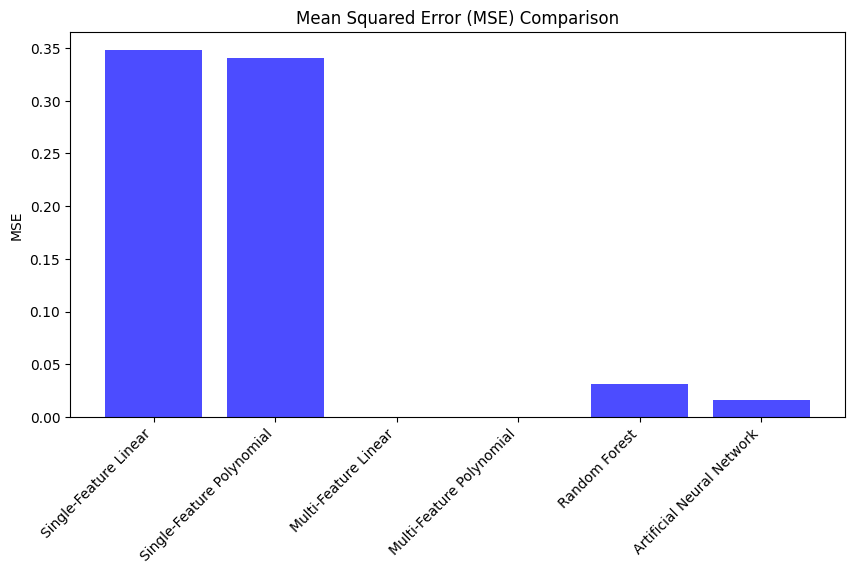

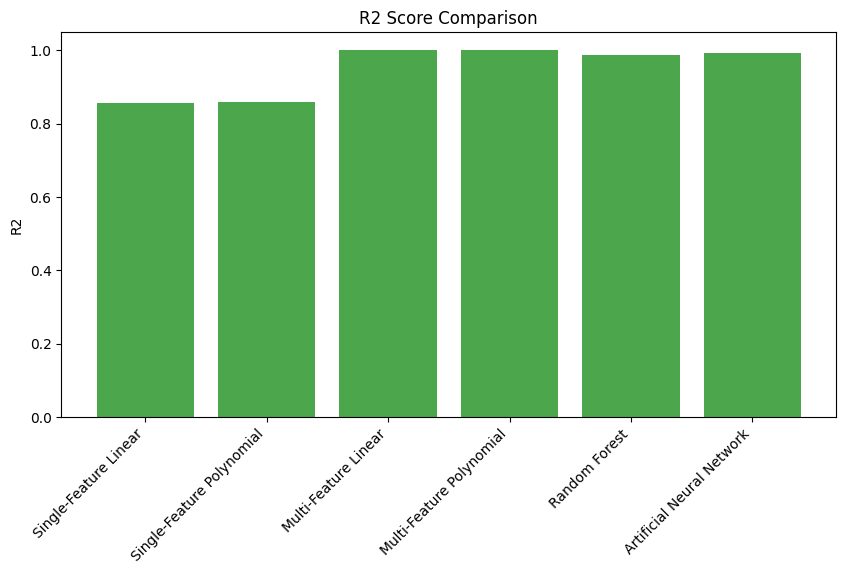

The best model is: Multi-Feature Linear
With MSE = 3.415202424043341e-05 and R2 = 0.9999859520582102


In [9]:
# Define a dictionary to store results of all models for comparison
model_results = {
    'Single-Feature Linear': {'MSE': 0.3478, 'R2': 0.8569},  # Replace with your results
    'Single-Feature Polynomial': {'MSE': 0.3410, 'R2': 0.8597},  # Replace with your results
    'Multi-Feature Linear': {'MSE': multi_linear_mse, 'R2': multi_linear_r2},
    'Multi-Feature Polynomial': {'MSE': multi_poly_mse, 'R2': multi_poly_r2},
    'Random Forest': {'MSE': mse, 'R2': r2},
    'Artificial Neural Network': {'MSE': test_mse, 'R2': ann_r2}
}

# Display results
print("Comparison of Model Performance:")
for model_name, metrics in model_results.items():
    print(model_name + ": MSE = " + str(metrics['MSE']) + ", R2 = " + str(metrics['R2']))

# Create a bar chart to visualize MSE and R2 scores
models = list(model_results.keys())
mse_values = [metrics['MSE'] for metrics in model_results.values()]
r2_values = [metrics['R2'] for metrics in model_results.values()]

# Plot MSE
plt.figure(figsize=(10, 5))
plt.bar(models, mse_values, color='blue', alpha=0.7)
plt.title('Mean Squared Error (MSE) Comparison')
plt.ylabel('MSE')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plot R2 Score
plt.figure(figsize=(10, 5))
plt.bar(models, r2_values, color='green', alpha=0.7)
plt.title('R2 Score Comparison')
plt.ylabel('R2')
plt.xticks(rotation=45, ha='right')
plt.show()

# Determine the best model based on R2 and MSE
best_model = max(model_results, key=lambda x: model_results[x]['R2'])
print("The best model is:", best_model)
print("With MSE =", model_results[best_model]['MSE'], "and R2 =", model_results[best_model]['R2'])

#### 1f


Clustering with features: ['NA_Sales', 'EU_Sales']


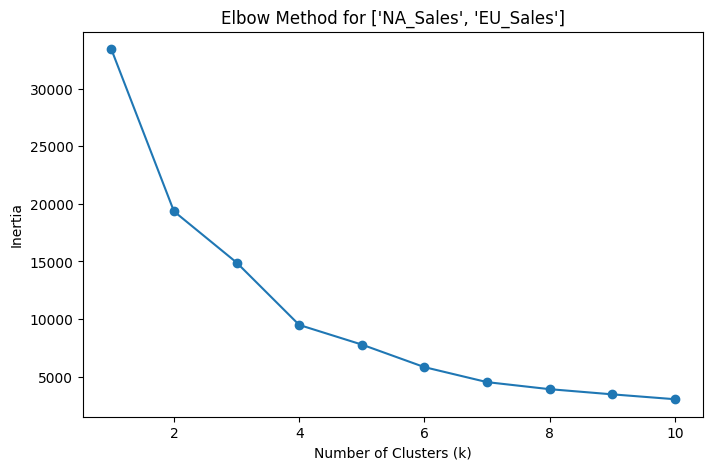

Optimal k: 4
Silhouette Score: 0.8332016110652556
Davies-Bouldin Index: 0.5598723310622952


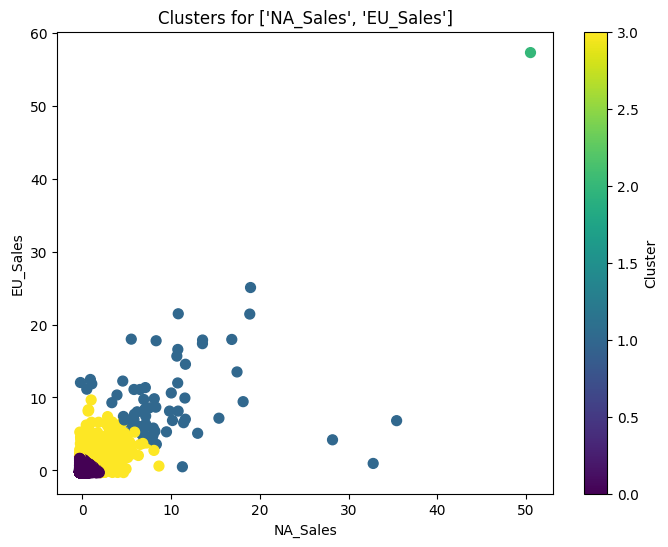


Clustering with features: ['JP_Sales', 'Global_Sales']


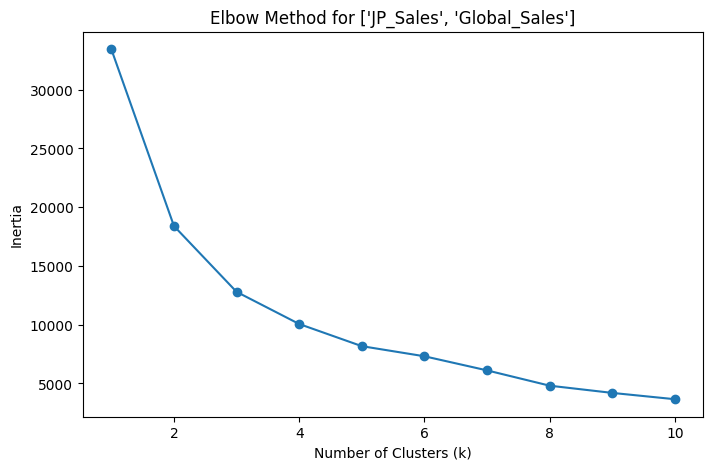

Optimal k: 4
Silhouette Score: 0.8042197504920231
Davies-Bouldin Index: 0.8488763228683637


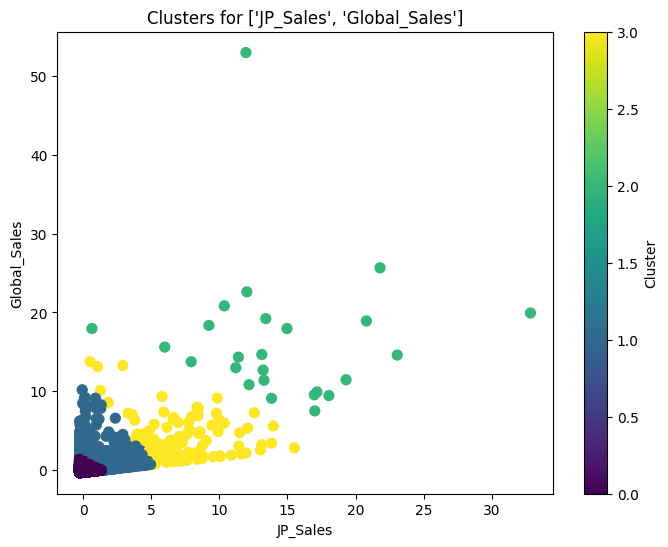


Clustering with features: ['NA_Sales', 'EU_Sales', 'Global_Sales']


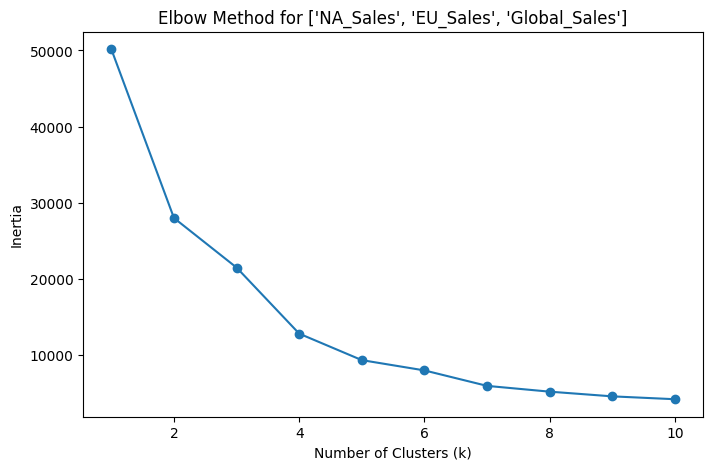

Optimal k: 4
Silhouette Score: 0.849001999727933
Davies-Bouldin Index: 0.502808379653066


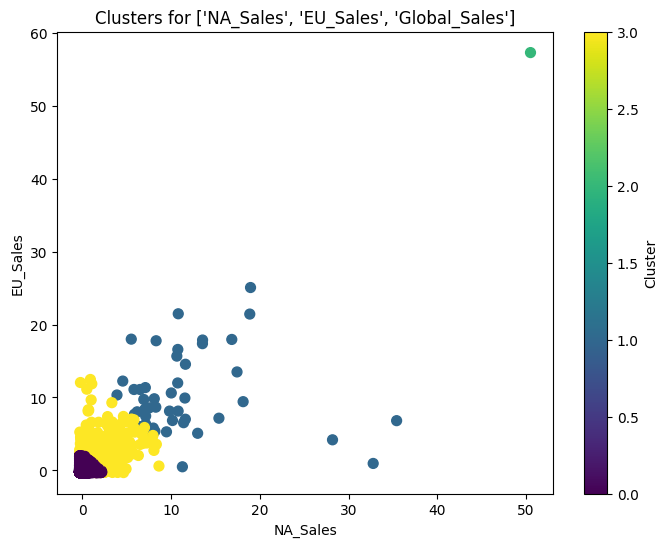

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Select numerical features for clustering
features_combinations = [
    ['NA_Sales', 'EU_Sales'],
    ['JP_Sales', 'Global_Sales'],
    ['NA_Sales', 'EU_Sales', 'Global_Sales']
]

# Store results for evaluation
clustering_results = {}

# Loop through different combinations of features
for features in features_combinations:
    print("\nClustering with features:", features)
    X = video_games_df[features].dropna()
    
    # Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Determine the optimal number of clusters using the Elbow Method
    inertia_values = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_scaled)
        inertia_values.append(kmeans.inertia_)
    
    # Plot inertia for Elbow Method
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, 11), inertia_values, marker='o')
    plt.title("Elbow Method for " + str(features))
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Inertia")
    plt.show()

    # Fit KMeans with optimal k (based on visual inspection of the Elbow plot)
    optimal_k = 4  
    kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
    cluster_labels = kmeans_final.fit_predict(X_scaled)
    
    # Evaluate clustering performance
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    davies_bouldin = davies_bouldin_score(X_scaled, cluster_labels)
    
    print("Optimal k:", optimal_k)
    print("Silhouette Score:", silhouette_avg)
    print("Davies-Bouldin Index:", davies_bouldin)
    
    # Store results
    clustering_results[tuple(features)] = {
        'Optimal k': optimal_k,
        'Silhouette Score': silhouette_avg,
        'Davies-Bouldin Index': davies_bouldin
    }

    # Visualize clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis', s=50)
    plt.title("Clusters for " + str(features))
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.colorbar(label="Cluster")
    plt.show()

In [12]:
# Display clustering results summary
print("\nClustering Results Summary:")
for features, metrics in clustering_results.items():
    print("Features:", features)
    print("Optimal k:", metrics['Optimal k'])
    print("Silhouette Score:", metrics['Silhouette Score'])
    print("Davies-Bouldin Index:", metrics['Davies-Bouldin Index'])
    print()


Clustering Results Summary:
Features: ('NA_Sales', 'EU_Sales')
Optimal k: 4
Silhouette Score: 0.8332016110652556
Davies-Bouldin Index: 0.5598723310622952

Features: ('JP_Sales', 'Global_Sales')
Optimal k: 4
Silhouette Score: 0.8042197504920231
Davies-Bouldin Index: 0.8488763228683637

Features: ('NA_Sales', 'EU_Sales', 'Global_Sales')
Optimal k: 4
Silhouette Score: 0.849001999727933
Davies-Bouldin Index: 0.502808379653066



#### 1g


Clustering with features: ['NA_Sales', 'EU_Sales']
K-Means - Silhouette Score: 0.8332016110652556 , Davies-Bouldin Index: 0.5598723310622952
DBSCAN - Silhouette Score: 0.8581765321258263 , Davies-Bouldin Index: 0.18081891472944533


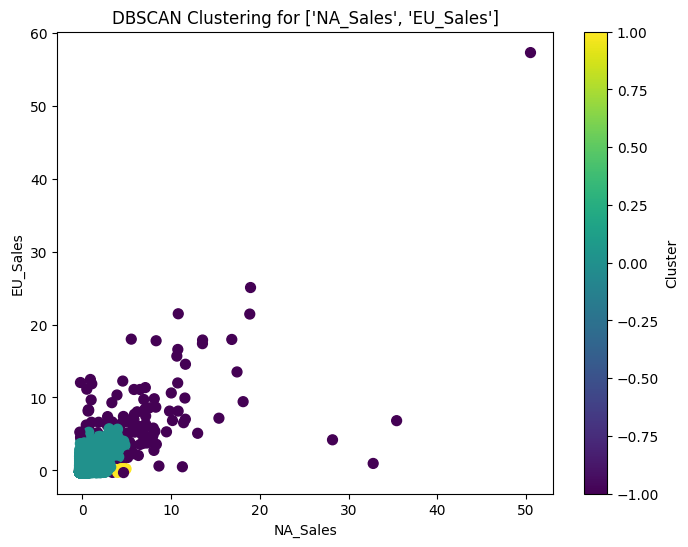


Clustering with features: ['JP_Sales', 'Global_Sales']
K-Means - Silhouette Score: 0.8042197504920231 , Davies-Bouldin Index: 0.8488763228683637
DBSCAN - Silhouette Score: 0.8745548089652821 , Davies-Bouldin Index: 0.3761199366598043


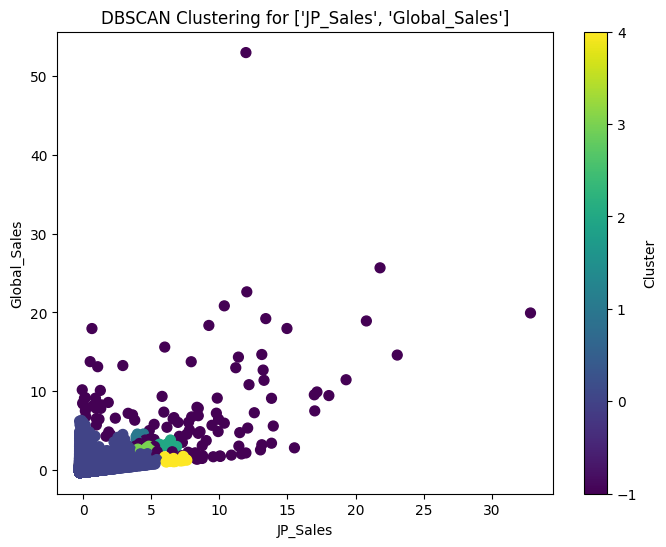


Clustering with features: ['NA_Sales', 'EU_Sales', 'Global_Sales']
K-Means - Silhouette Score: 0.849001999727933 , Davies-Bouldin Index: 0.502808379653066
DBSCAN - Silhouette Score: 0.8551227954675565 , Davies-Bouldin Index: 0.371910274089902


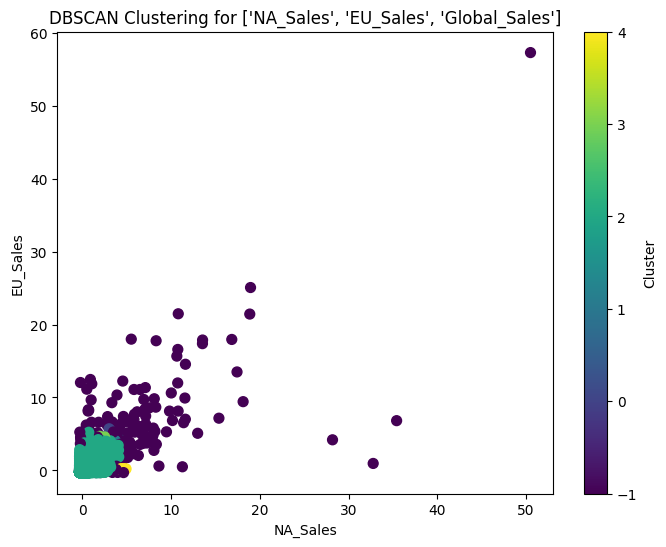

In [14]:
from sklearn.cluster import DBSCAN
# Initialize a dictionary to store the results
results = {}

# Loop through the feature combinations
for features in features_combinations:
    print("\nClustering with features:", features)

    # Prepare and standardize the data
    X = video_games_df[features].dropna()
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # --- K-Means Clustering ---
    kmeans = KMeans(n_clusters=4, random_state=42) 
    kmeans_labels = kmeans.fit_predict(X_scaled)

    # Evaluate K-Means
    kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
    kmeans_db_index = davies_bouldin_score(X_scaled, kmeans_labels)

    # --- DBSCAN Clustering ---
    dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples if needed
    dbscan_labels = dbscan.fit_predict(X_scaled)

    # Evaluate DBSCAN (exclude noise points labeled as -1)
    if len(set(dbscan_labels)) > 1:  # Ensure there are clusters
        dbscan_silhouette = silhouette_score(X_scaled[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
        dbscan_db_index = davies_bouldin_score(X_scaled[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
    else:
        dbscan_silhouette = -1
        dbscan_db_index = float('inf')

    # Store the results for this feature combination
    results[tuple(features)] = {
        'KMeans': {'Silhouette Score': kmeans_silhouette, 'Davies-Bouldin Index': kmeans_db_index},
        'DBSCAN': {'Silhouette Score': dbscan_silhouette, 'Davies-Bouldin Index': dbscan_db_index}
    }

    # Print the results for this feature combination
    print("K-Means - Silhouette Score:", kmeans_silhouette, ", Davies-Bouldin Index:", kmeans_db_index)
    print("DBSCAN - Silhouette Score:", dbscan_silhouette, ", Davies-Bouldin Index:", dbscan_db_index)

    # Visualize DBSCAN Clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis', s=50)
    plt.title("DBSCAN Clustering for {}".format(features))
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.colorbar(label="Cluster")
    plt.show()

In [15]:
# Display all results
print("\nSummary of Clustering Results:")
for feature_pair, metrics in results.items():
    print("\nFeatures:", feature_pair)
    print("K-Means -> Silhouette Score:", metrics['KMeans']['Silhouette Score'], 
          ", Davies-Bouldin Index:", metrics['KMeans']['Davies-Bouldin Index'])
    print("DBSCAN -> Silhouette Score:", metrics['DBSCAN']['Silhouette Score'], 
          ", Davies-Bouldin Index:", metrics['DBSCAN']['Davies-Bouldin Index'])


Summary of Clustering Results:

Features: ('NA_Sales', 'EU_Sales')
K-Means -> Silhouette Score: 0.8332016110652556 , Davies-Bouldin Index: 0.5598723310622952
DBSCAN -> Silhouette Score: 0.8581765321258263 , Davies-Bouldin Index: 0.18081891472944533

Features: ('JP_Sales', 'Global_Sales')
K-Means -> Silhouette Score: 0.8042197504920231 , Davies-Bouldin Index: 0.8488763228683637
DBSCAN -> Silhouette Score: 0.8745548089652821 , Davies-Bouldin Index: 0.3761199366598043

Features: ('NA_Sales', 'EU_Sales', 'Global_Sales')
K-Means -> Silhouette Score: 0.849001999727933 , Davies-Bouldin Index: 0.502808379653066
DBSCAN -> Silhouette Score: 0.8551227954675565 , Davies-Bouldin Index: 0.371910274089902
